## The Data
We will be using the famous [Iris flower data set](http://en.wikipedia.org/wiki/Iris_flower_data_set). 

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by Sir Ronald Fisher in the 1936 as an example of discriminant analysis. 

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor), so 150 total samples. Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

Here's a picture of the three different Iris types:

In [20]:
# important libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Getting data from seaborn

In [21]:
iris = sns.load_dataset('iris')

In [22]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [23]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


## Exploratory Data Analysis

Let's visualize the data and get you started!

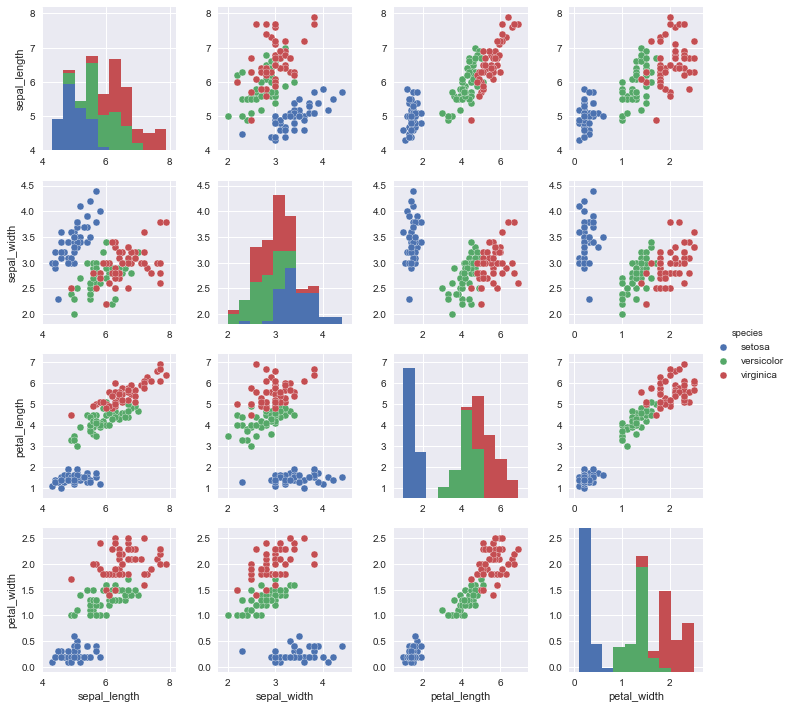

In [24]:
sns.pairplot(iris, hue='species')

*From above graph, we can distinguish 'setosa' from other two species- 'versicolor' and 'virdinica'. 
The case is not same for 'versicolor' and 'virdinica'*

## Machine Learning

### Standardize the Variables

In [25]:
# Get X and y
X = iris.loc[ : , ['sepal_length', 'sepal_width','petal_length','petal_width']].values

# Transform 'virginica' to be the positive class (binary classification)
y = iris['species'].map({"setosa":0, 'versicolor':1, 'virginica': 0}).values 

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
# create StandardScaler object

scaler = StandardScaler()

In [28]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [29]:
#Use the .transform() method to transform the features to a scaled version

scaler_values = scaler.transform(X)

In [30]:
#Convert this into pd.DataFrame

X_std = pd.DataFrame(scaler_values,columns=iris.columns[:-1])

X_std.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


### Train/Test split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_std_train, X_std_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=1)

### Models
* We will create all the 5 models

In [33]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C = 1)

# k-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Support Vector Machine
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1)

# Random Forest (ensemble of Decision Trees)
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=1, random_state=0)

# Neural Network
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()

### Cross Validation

In [34]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, X_std_train, y_train, scoring='accuracy', cv=10)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())               # accuracy measure
    print("Standard deviation:", scores.std())  # std measures how precise the measure is

In [35]:
display_scores(scores)

Scores: [ 0.58333333  0.5         0.90909091  0.8         0.7         0.7         1.
  0.6         0.8         0.6       ]
Mean: 0.719242424242
Standard deviation: 0.149541770241


In [36]:
# create the classifier 
classifiers = [log_reg, knn, svm, forest, nn]

model_scores = []
for clf in classifiers:
    model_scores.append(cross_val_score(clf, X_std_train, y_train, scoring='accuracy', cv=10))

C:\Users\Sameep\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Sameep\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Sameep\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Sameep\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

In [37]:
models_df = pd.DataFrame(model_scores, columns=[1,2,3,4,5,6,7,8,9,10],
                               index=["LR", "KNN", "SVM", "Forest", "NN"])

In [38]:
models_df["Mean"] = models_df.mean(axis=1)
models_df

,1,2,3,4,5,6,7,8,9,10,Mean
LR,0.583333,0.500000,0.909091,0.8,0.7,0.7,1.0,0.6,0.8,0.6,0.719242
KNN,0.916667,1.000000,0.818182,1.0,1.0,0.9,1.0,0.9,1.0,0.9,0.943485
SVM,0.583333,0.583333,0.818182,0.8,0.7,0.6,1.0,0.6,0.8,0.6,0.708485
Forest,1.000000,0.750000,0.909091,1.0,1.0,0.9,1.0,1.0,1.0,1.0,0.955909
NN,0.916667,1.000000,0.909091,1.0,0.9,0.8,1.0,0.8,0.9,0.8,0.902576


### Boxplot for cross-validation

Text(0.5,1,'Classification Accuracy using All Features')

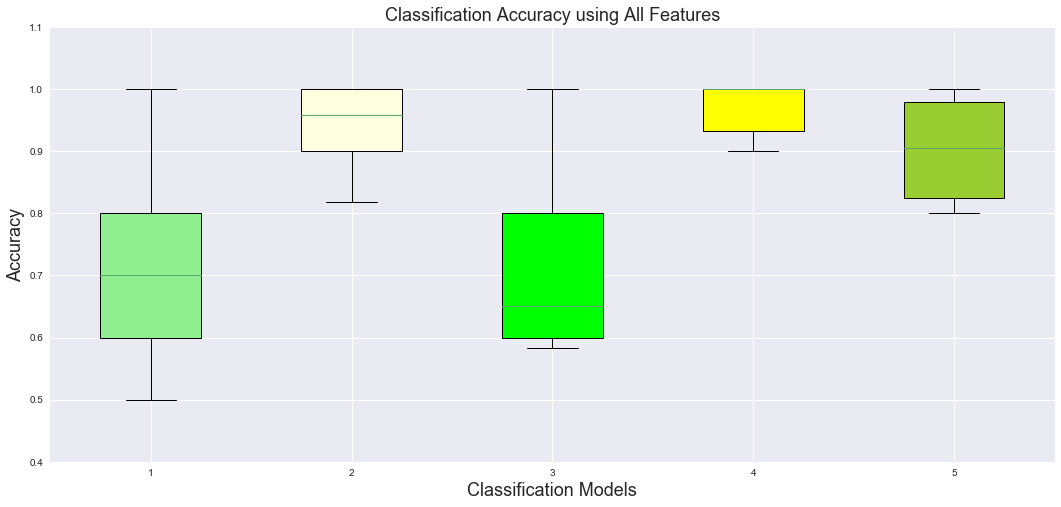

In [39]:
# BOXPLOT comparing models and comparing SVM using different feature subsets
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 8))
# rectangular box plot
bplot_models = axes.boxplot(model_scores, vert=True, patch_artist=True)

# fill with colors - Models
colors_d = ["lightgreen", "lightyellow", "lime", "yellow", "yellowgreen"]
for patch, color in zip(bplot_models['boxes'], colors_d):
    patch.set_facecolor(color)
    
    # adding axes labels
axes.yaxis.grid(True)
axes.set_xticks([y+1 for y in range(len(model_scores))])
axes.set_xlabel('Classification Models', fontsize=18)
axes.set_ylabel('Accuracy', fontsize=18)
axes.set_ylim((.4, 1.1))
axes.set_title('Classification Accuracy using All Features', fontsize = 18)

### Confusion Matrix and Classification Report

*From the boxplot, we can consider the Random Forest model*

In [40]:
#fit the model
forest.fit(X_std_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [41]:
# understand the predication
prediction = forest.predict(X_std_test)

In [42]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
print(confusion_matrix(y_test,prediction))

[[27  0]
 [ 1 17]]


In [44]:
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98        27
          1       1.00      0.94      0.97        18

avg / total       0.98      0.98      0.98        45



Text(0,0.5,'true label')

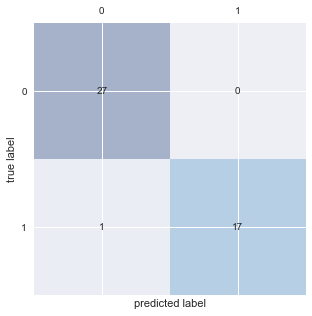

In [47]:
confmat = confusion_matrix(y_test,prediction)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')